In [27]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.lite as tflite

import numpy as np

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
# !wget https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/model_2024_hairstyle.keras

In [3]:
model = keras.models.load_model('model_2024_hairstyle.keras')

In [4]:
tf.__version__

'2.16.2'

## Convert TF Model to TFLite Model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('model_2024_hairstyle.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/z7/8f0d81rd03s5mm4pjv0xdyvm0000gn/T/tmpazipsn8r/assets


INFO:tensorflow:Assets written to: /var/folders/z7/8f0d81rd03s5mm4pjv0xdyvm0000gn/T/tmpazipsn8r/assets


## Prepare TFLite Model

In [2]:
interpreter = tflite.Interpreter(model_path = 'model_2024_hairstyle.tflite')
# Arrange memory resources for each step (input, process, output)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']

output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [8]:
output_index

13

## Prepare Image

In [10]:
! pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.8 MB/s eta 0:00:00a 0:00:01


In [24]:
from io import BytesIO
from urllib import request
import ssl
import certifi
from PIL import Image

def download_image(url):
    context = ssl.create_default_context(cafile=certifi.where())
    with request.urlopen(url, context=context) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

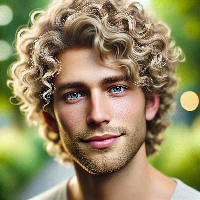

In [26]:
img = download_image('https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg')
img = prepare_image(img, (200, 200))
img

## Process Image Data

In [56]:
x = np.array(img, dtype = 'float32')
X = np.array([x])

In [57]:
def preprocess_input(x):
    x /= 255.0
    return x

In [58]:
X = preprocess_input(X)

In [59]:
X[0,0,0,0]

0.23921569

## Apply Model to Image

In [61]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
pred = interpreter.get_tensor(output_index)

In [63]:
float(pred)

/var/folders/z7/8f0d81rd03s5mm4pjv0xdyvm0000gn/T/ipykernel_4909/2656916057.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(pred)


0.8937740921974182